In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import seaborn as sns

In [128]:
datavalue=datasets.load_digits()
x_value=datavalue.data
y_value=datavalue.target
print(x_value.shape,y_value.shape)
x_train,x_test,y_train,y_test=train_test_split(x_value,y_value,test_size=0.3,random_state=49)

(1797, 64) (1797,)


first row= [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


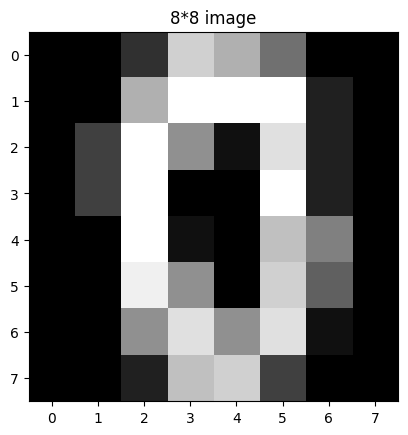

In [129]:
#printing first row of the dataset
print(f'first row= {x_value[0,:]}')
#reshapping it to find the image since it is 8*8 pixel spread out in one row
image=x_value[20,:].reshape(8,8)
plt.imshow(image,cmap='grey')
plt.title('8*8 image')
plt.show()

**Using hyperparamter tuning also stratified k fold meathod**

In [143]:
# para_grid={
#     "max_depth":[5,10,11,7,15,20,4,],
#     "min_samples_split":[2,3,4,5,6,7],
#     "min_samples_leaf":[1,2,3,4,5,6,8],
#     "criterion":['friedman_mse', 'squared_error'],
# }
# model=GradientBoostingClassifier(random_state=42)
# cross_val=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
# final_model=RandomizedSearchCV(estimator=model,param_distributions=para_grid,cv=cross_val,verbose=2,n_iter=20)
# final_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=  27.4s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=  27.2s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=  25.1s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=  25.1s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=6, min_samples_split=6; total time=  21.7s
[CV] END criterion=squared_error, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  48.8s
[CV] END criterion=squared_error, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  47.2s
[CV] END criterion=squared_error, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  47.8s
[CV] END criterion=squared_error, max_depth=10, min_samples_leaf=2, min_samples_spli

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'max_depth': [5, 10, 11, 7, 15, 20, 4],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             8],
                                        'min_samples_split': [2, 3, 4, 5, 6,
                                                              7]},
                   verbose=2)

**Best Parameters: {'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'squared_error'}**
*Best Cross-Validated Accuracy: 0.9625972301271105*

In [144]:
print("Best Parameters:", final_model.best_params_)
print("Best Cross-Validated Accuracy:", final_model.best_score_)

Best Parameters: {'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'squared_error'}
Best Cross-Validated Accuracy: 0.9625972301271105


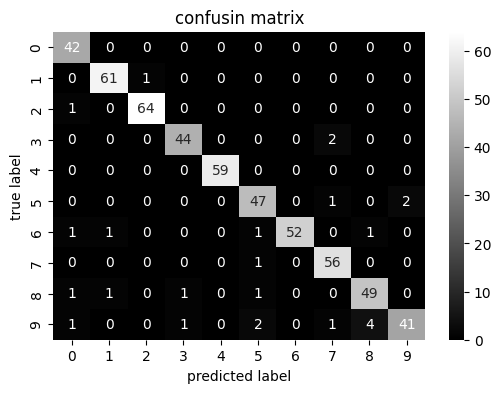

In [145]:
# model=DecisionTreeClassifier(max_depth=11, min_samples_split=2,criterion='entropy')
# model.fit(x_train,y_train)
y_pred=final_model.predict(x_test)
matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(matrix,annot=True, fmt='d', cmap='grey', cbar=True)
plt.title('confusin matrix')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


In [146]:
accuracy=accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'accuracy={accuracy}\n prec={precision} \n recall={recall} \n f1={f1}')


accuracy=0.9537037037037037
 prec=0.9547016500152853 
 recall=0.9537037037037037 
 f1=0.95333230839561


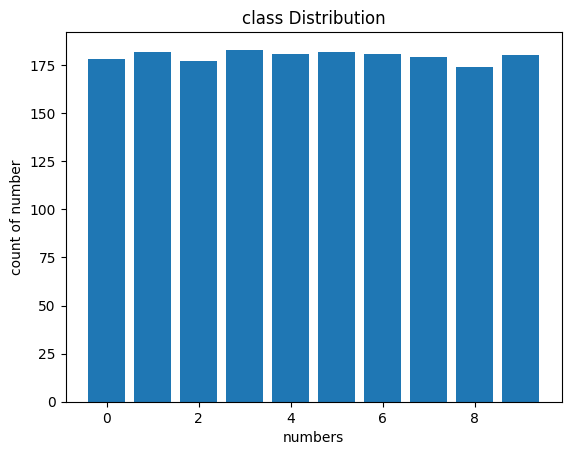

In [147]:
unique,counts=np.unique(y_value,return_counts=True)
plt.bar(unique,counts)
plt.xlabel('numbers')
plt.ylabel('count of number')
plt.title('class Distribution')
plt.show()

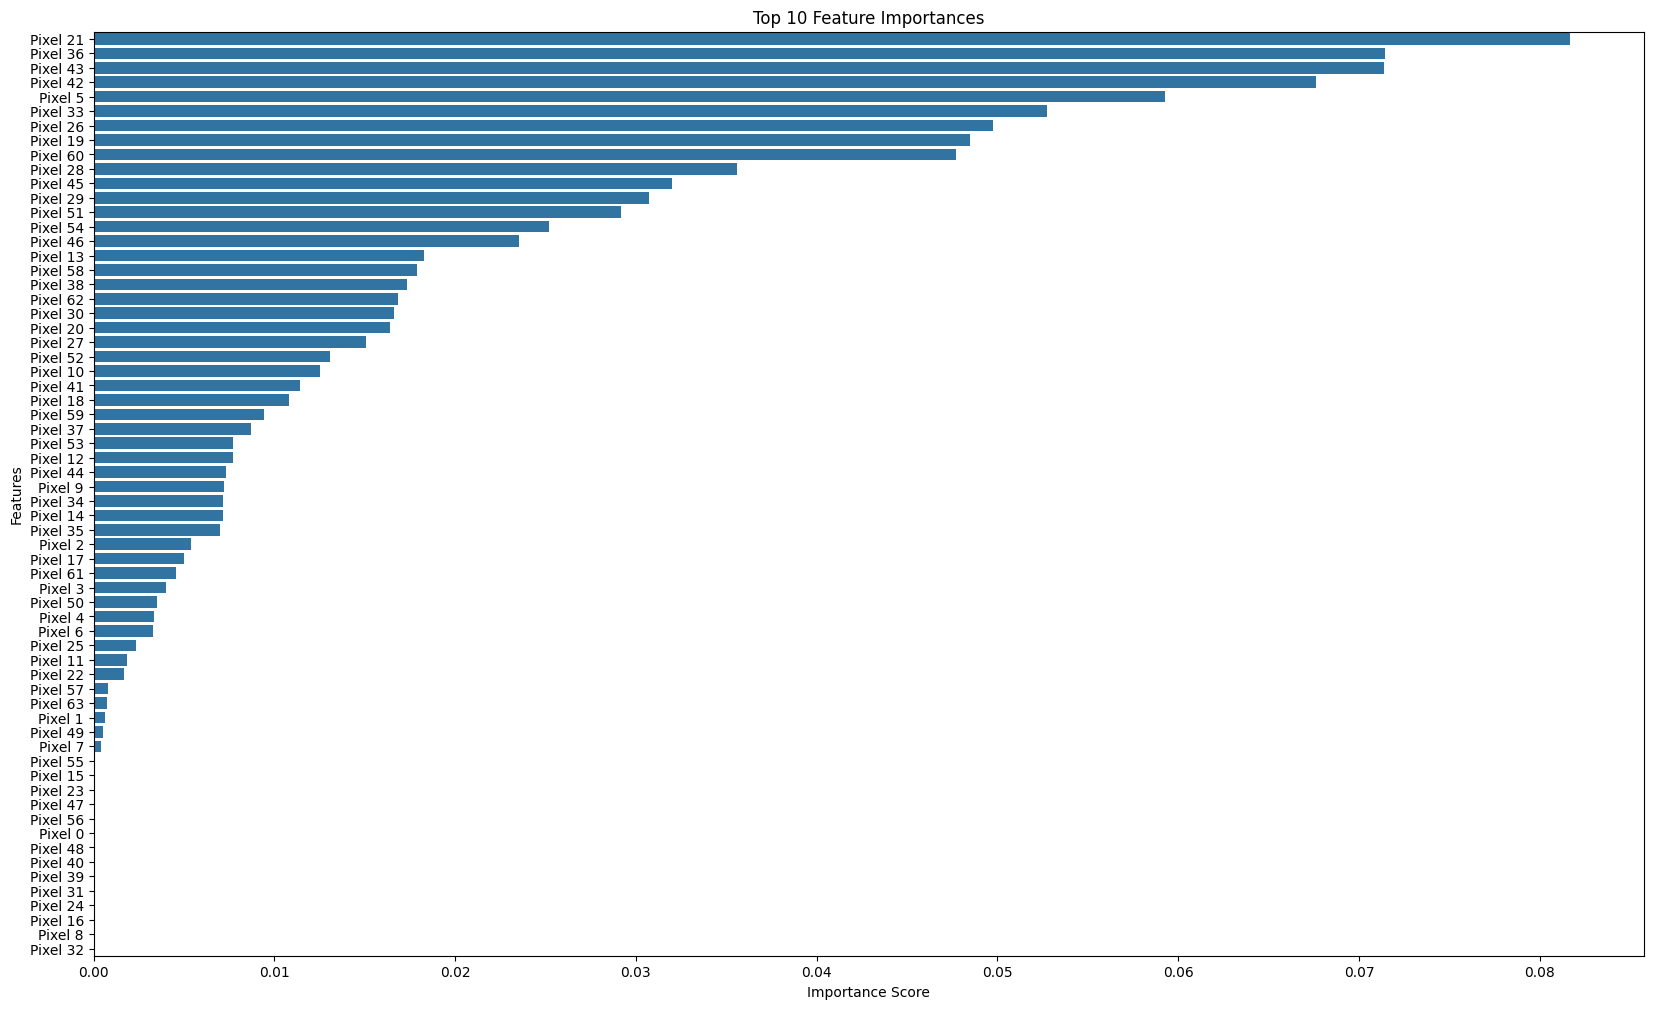

In [148]:
# After fitting the model
importances = final_model.best_estimator_.feature_importances_

# Get feature names (if applicable, or you can just use indices)
feature_names = [f'Pixel {i}' for i in range(x_value.shape[1])]

# Create a DataFrame for better visualization
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(20, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(64))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
